# **Computational Drug Discovery Comparing Regressors**




**We will use the Package of pycaret as its has low line of code for multiple regressors comparision and plots visualization.
 For interpertation models we use the Shap Package**

## **1. Install the Package's**

In [ ]:
#! pip install pycaret 
#! pip install scikit-learn==0.23.2
#! pip install numpy==1.19.5
#! pip install shap 
#if using gpu use below
#! pip uninstall lightgbm -y
#! pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.3/include" --install-option="--opencl-library=C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.3/lib/x64/OpenCL.lib" --install-option="--boost-dir= C:/local/boost_1_76_0" --install-option="--boost-librarydir=C:/local/boost_1_76_0/lib64-msvc-14.2"


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

## **2. Load the data set**


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive' ,force_remount=True)

**Import libraries**

In [38]:
import pandas as pd
from pycaret.regression import *

In [ ]:
#! cp /content//drive/MyDrive/Colab_Notebooks/Full_Sem_Project/Results/clean_fp.zip /content/
#! unzip clean_fp.zip

## **3. Data pre-processing**

Import Clean Fingerprint Files *.csv

In [40]:
ap2d = pd.read_csv('AtomPair2D.csv') 
#view
ap2d

,Unnamed: 0,pIC50,AD2D13,AD2D14,AD2D81,AD2D91,AD2D92,AD2D93,AD2D102,AD2D156,...,AD2D704,AD2D705,AD2D706,AD2D708,AD2D715,AD2D716,AD2D720,AD2D725,AD2D726,AD2D729
0,1,8.958607,0,0,0,1,1,0,0,0,...,1,1,0,1,0,0,1,1,0,1
1,2,9.397940,0,0,0,1,1,0,0,0,...,1,1,0,1,0,0,1,1,0,1
2,3,7.356547,0,0,1,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,9.045757,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,5,8.522879,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2182,5.853872,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2182,2183,4.000000,1,0,1,1,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0
2183,2184,8.301030,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2184,2185,8.301030,1,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [41]:
model  = setup(data = ap2d, target = 'pIC50', train_size=0.8, silent=True)
"""
model2  = setup(data = ap2dc, target = 'pIC50', train_size=0.8, silent=True)
model3  = setup(data = est, target = 'pIC50', train_size=0.8, silent=True)
model4  = setup(data = fp, target = 'pIC50', train_size=0.8, silent=True)
model5  = setup(data = extd, target = 'pIC50', train_size=0.8, silent=True)
model6  = setup(data = grph, target = 'pIC50', train_size=0.8, silent=True)
model7  = setup(data = kelr, target = 'pIC50', train_size=0.8, silent=True)
model8  = setup(data = kelrc, target = 'pIC50', train_size=0.8, silent=True)
model9  = setup(data = mac, target = 'pIC50', train_size=0.8, silent=True)
model10 = setup(data = pb, target = 'pIC50', train_size=0.8, silent=True)
model11 = setup(data = sub, target = 'pIC50', train_size=0.8, silent=True)
model12 = setup(data = subc, target = 'pIC50', train_size=0.8, silent=True)
"""

,Description,Value
0,session_id,826
1,Target,pIC50
2,Original Data,"(2186, 75)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,73
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1748, 73)"


"\nmodel2  = setup(data = ap2dc, target = 'pIC50', train_size=0.8, silent=True)\nmodel3  = setup(data = est, target = 'pIC50', train_size=0.8, silent=True)\nmodel4  = setup(data = fp, target = 'pIC50', train_size=0.8, silent=True)\nmodel5  = setup(data = extd, target = 'pIC50', train_size=0.8, silent=True)\nmodel6  = setup(data = grph, target = 'pIC50', train_size=0.8, silent=True)\nmodel7  = setup(data = kelr, target = 'pIC50', train_size=0.8, silent=True)\nmodel8  = setup(data = kelrc, target = 'pIC50', train_size=0.8, silent=True)\nmodel9  = setup(data = mac, target = 'pIC50', train_size=0.8, silent=True)\nmodel10 = setup(data = pb, target = 'pIC50', train_size=0.8, silent=True)\nmodel11 = setup(data = sub, target = 'pIC50', train_size=0.8, silent=True)\nmodel12 = setup(data = subc, target = 'pIC50', train_size=0.8, silent=True)\n"

## **4. Compare ML algorithms**

In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6592,0.7683,0.8752,0.4375,0.1118,0.0968,0.0380
rf,Random Forest Regressor,0.6595,0.7916,0.8877,0.4222,0.1137,0.0975,0.2310
knn,K Neighbors Regressor,0.6697,0.8211,0.9048,0.3994,0.1157,0.0990,0.0220
gbr,Gradient Boosting Regressor,0.7379,0.8974,0.9458,0.3466,0.1229,0.1106,0.1250
br,Bayesian Ridge,0.8206,1.0827,1.0387,0.2120,0.1352,0.1234,0.0120
ridge,Ridge Regression,0.8258,1.0943,1.0440,0.2035,0.1353,0.1237,0.0070
lr,Linear Regression,0.8269,1.0970,1.0453,0.2016,0.1354,0.1238,0.0190
ada,AdaBoost Regressor,0.8507,1.1088,1.0521,0.1896,0.1347,0.1241,0.0490
huber,Huber Regressor,0.8229,1.1172,1.0545,0.1884,0.1374,0.1246,0.1360
et,Extra Trees Regressor,0.7610,1.1494,1.0705,0.1558,0.1378,0.1120,0.2810


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=826, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create Model On Selected Model**

In [43]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6613,0.7312,0.8551,0.4301,0.1039,0.0930
1,0.6036,0.6449,0.8031,0.5278,0.1039,0.0891
2,0.6688,0.7585,0.8709,0.4968,0.1099,0.0959
3,0.6788,0.8184,0.9047,0.2889,0.1147,0.1004
4,0.6516,0.6995,0.8364,0.5015,0.1061,0.0963
5,0.6566,0.6995,0.8364,0.4378,0.1040,0.0940
6,0.6486,0.7873,0.8873,0.3717,0.1154,0.0938
7,0.7258,0.9844,0.9922,0.3713,0.1330,0.1140
8,0.6482,0.7951,0.8917,0.4447,0.1157,0.0955
9,0.6490,0.7642,0.8742,0.5045,0.1114,0.0959


## **5. Tuning of model performance**

**Tuning the Hyperparameter**

In [44]:
tuned_lightgbm = tune_model(lightgbm, n_iter= 50,optimize='mae')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6596,0.7285,0.8535,0.4322,0.1051,0.0934
1,0.6425,0.7140,0.8450,0.4773,0.1101,0.0954
2,0.6881,0.7638,0.8740,0.4933,0.1110,0.0995
3,0.6945,0.8268,0.9093,0.2816,0.1148,0.1019
4,0.6710,0.7359,0.8578,0.4756,0.1084,0.0994
5,0.6753,0.7275,0.8530,0.4153,0.1062,0.0966
6,0.6885,0.8125,0.9014,0.3515,0.1144,0.0978
7,0.7397,0.9827,0.9913,0.3724,0.1311,0.1150
8,0.6800,0.8376,0.9152,0.4150,0.1177,0.0997
9,0.6980,0.8491,0.9215,0.4494,0.1184,0.1038


In [45]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=56, min_child_weight=0.001, min_split_gain=0,
              n_estimators=270, n_jobs=-1, num_leaves=200, objective=None,
              random_state=826, reg_alpha=0.05, reg_lambda=0.01, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Model Hyperparameter**

Original Model Parameters

In [46]:
plot_model(lightgbm, 'parameter' )

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


Tuned Model Parameters

In [47]:
plot_model(tuned_lightgbm, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,56
min_child_weight,0.001
min_split_gain,0
n_estimators,270


# **6. Model Analysis**

Details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

In [48]:
plot_model(tuned_lightgbm, 'residuals' , save = True ) 

'Residuals.png'

**Prediction Error Plot**

In [49]:
plot_model(tuned_lightgbm, 'error' , save = True )

'Prediction Error.png'

**Recursive Feature Selection**

In [50]:
#plot_model(tuned_lightgbm, 'rfe' , save = True )

**Learning Curve**

In [51]:
plot_model(tuned_lightgbm, 'learning' , save = True ) 

'Learning Curve.png'

**Validation Curve**

In [52]:
plot_model(tuned_lightgbm, 'vc' , save = True ) 

'Validation Curve.png'

**Model Interpretaion**

SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

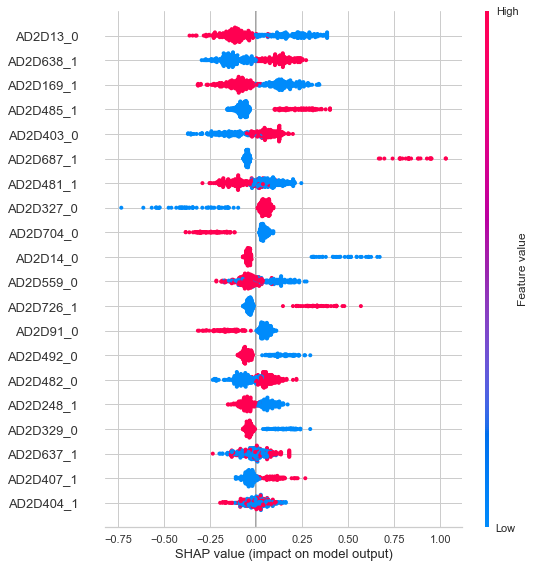

In [53]:
interpret_model(tuned_lightgbm , save = True )

**Correlation Plot**

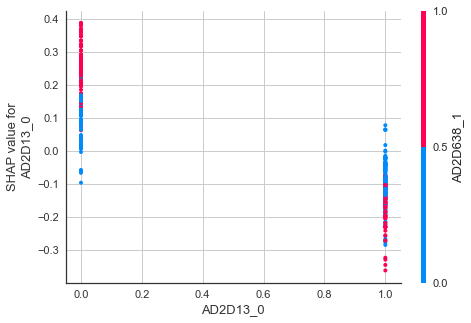

In [54]:
interpret_model(tuned_lightgbm, plot = 'correlation') 

**Reason Plot at Observation Level**

The Reason Plot at Observation Level as called by PyCaret is better known as the force plot and this plot essentially describes the push and pull effect that each individual features has on the base value that eventually leads to the predicted output value.


In [55]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 10 , save = True )  

# **Testing on 20% Model**

In [56]:
prediction_holdout = predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.7019,0.8226,0.9070,0.4370,0.1145,0.1024


In [57]:
# Prediction Value in "Label"
prediction_holdout


,AD2D13_0,AD2D14_0,AD2D81_0,AD2D91_0,AD2D92_1,AD2D93_1,AD2D102_0,AD2D156_1,AD2D169_1,AD2D170_0,...,AD2D706_0,AD2D708_0,AD2D715_0,AD2D716_1,AD2D720_0,AD2D725_1,AD2D726_1,AD2D729_1,pIC50,Label
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8.376751,7.911029
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.221848,7.633055
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.026872,7.530004
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,9.397940,8.712390
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.267606,6.926853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,6.311580,7.090867
434,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.853872,8.107041
435,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.000000,4.399441
436,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,9.221848,8.058614


**Finalize Model**
Finalizing the model on entire dataset is as easy as writing finalize_model. This function takes trained model object and returns a model that has been trained on the entire dataset. 


In [58]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [59]:
#difference
lightgbm, lightgbm , final_lightgbm


(LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=826, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=826, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
       

In [61]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.5350,0.4914,0.7010,0.6637,0.0885,0.0775


,AD2D13_0,AD2D14_0,AD2D81_0,AD2D91_0,AD2D92_1,AD2D93_1,AD2D102_0,AD2D156_1,AD2D169_1,AD2D170_0,...,AD2D706_0,AD2D708_0,AD2D715_0,AD2D716_1,AD2D720_0,AD2D725_1,AD2D726_1,AD2D729_1,pIC50,Label
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8.376751,7.915128
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.221848,7.925488
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.026872,7.471651
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,9.397940,8.781960
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.267606,7.147612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,6.311580,6.871735
434,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.853872,8.420339
435,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.000000,4.152442
436,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,9.221848,8.582949


In [62]:
save_expriment('Atom2d')

NameError: name 'save_expriment' is not defined